----------------------------------
   # Case Study:   AllLife Bank Customer  **Segmentation**
----------------------------------

## Context: 
    
- AllLife Bank wants to focus on its credit card customer base in the next financial year to improve the market penetration by   runing a personalized campaigns to target new customers as well as upsell to existing customers.
- The customers perceive the support services of the back poorly, the Operations team wants to upgrade the service delivery       model, to ensure that customer queries are resolved faster and more effeciently.
- In this case study, we will use clustering algorithms to segement AllLife customers in order to help AllLife bank achieve its   goals. This segemnation will be based on:
    - The customers spending patterns.
    - The customers past interactions with the bank.

## Probelm:

- Explore and visualize the dataset.
- Determine the distributions of the variables and how they relate to each other,
- Identify different segments in the existing customer, based on their spending patterns as well as past interaction with         the bank, using clustering algorithms.
- Generate a set of insights and recommendations that will help the bank to better penetrate the credit card market and to       improve its customers services'.

## Data Dictionary

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

## Importing necessary libraries

In [1]:
import warnings

warnings.filterwarnings("ignore")

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

sns.set(color_codes=True)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

<IPython.core.display.Javascript object>

 ## Loading the data

In [2]:
# Reading in the Dataset
dfAllLifeOriginal = pd.read_excel("Credit Card Customer Data.xlsx")
# Making a copy of data
dfAllLife = dfAllLifeOriginal.copy()
# Getting an overall information about the dataset
dfAllLife.info()
# View 15 sample rows of the dataset
dfAllLife.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
22,23,30507,6000,4,1,4,6
87,88,37559,5000,4,1,2,5
646,647,58392,186000,7,0,8,1
602,603,67415,37000,7,4,0,1
307,308,16374,8000,5,3,2,1
254,255,23302,16000,4,3,1,0
327,328,26767,11000,5,5,1,1
200,201,87350,8000,3,0,2,9
130,131,28701,18000,3,1,5,6
400,401,31551,75000,7,3,2,4


<IPython.core.display.Javascript object>

**Observations**
- There are 660 observations\rows and 7 columns\features,
- The columns Sl_No and Customer Key will be dropped, we will use the index instead. However before dropping these two columns we will use it to try to find any duplicates.
- All columns that we are going to keep are of numerical variables with types int64, we will keep them the way they are now.
- We will rename the following features to much the commen convention which is starting with a capital letter for each word:
    - Total_visits_bank  will be renamed to Total_Visits_Bank 
    - Total_visits_online will be renamed to Total_Visits_Online
    - Total_calls_made will be renamed to Total_Calls_Made.
    - Customer Key will be dropped, so there is no need for renaming it.

## Exploring, Visualizing, and Preparing the Dataset

In [3]:
# Renaming some features
dfAllLife.rename(
    columns={
        "Total_visits_bank": "Total_Visits_Bank",
        "Total_visits_online": "Total_Visits_Online",
        "Total_calls_made": "Total_Calls_Made",
    },
    inplace=True,
)

<IPython.core.display.Javascript object>

### Checking for duplicates.

In [4]:
# Checking for duplicated records using 'Sl_No' column
dfAllLife[dfAllLife["Sl_No"].duplicated() == True]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made


<IPython.core.display.Javascript object>

**Observations**
- There are no duplicated primary key of the records

In [5]:
# Checking for duplicated customers using 'Customer Key' column
dfAllLife[dfAllLife["Customer Key"].duplicated() == True]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


<IPython.core.display.Javascript object>

**Observations**
- There are five duplicated Customer identification number
- Let's further investigate these duplicated customer keys.

In [6]:
# Getting the records with the duplicated Customer Key
dfAllLife[dfAllLife["Customer Key"].isin([47437, 37252, 97935, 96929, 50706])]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


<IPython.core.display.Javascript object>

**Observations**
- All the duplicated records have just the customer Key as a duplicated column's value, all the other columns have different values.
- According to the data dictionary all the other columns they suppose to have the totals, therfore we can conclude that these records are not for duplicated customers but it was a mistake when the customer key value were entered. Hence we won't remove these records. However the bank should be notified about this mistake.

In [7]:
# Dropping the 'Sl_No' and 'Customer Key' columns
dfAllLife.drop(["Sl_No", "Customer Key"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Quick analysis of the attributes

In [8]:
dfAllLife.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_Visits_Bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_Visits_Online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_Calls_Made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


<IPython.core.display.Javascript object>

**Observations**

- The range for the credit limit on the credit card in dollars is between 3000 and 200000 ,where 75% of the customers have a credit limit <= 48000
- The range of the total credit cards is between 1 and 10, where 75% of the customer have <= 6 credit cards.
- The range of the total bank visits (yearly) is between 0 and 5, where 75% of the customer have visited the bank at most 4 times.
- The range of the total online logins (yearly) is between 0 and 15, where 75% of the customer have visited the online banking at most 4 times.
- The range of Total number of calls made by the customer to the bank or its customer service department (yearly) is between 0 and 10, where 75% of the customers called the bank <= 5 times.

## Univaraite Analysis

### Distribution of Numerical Variables

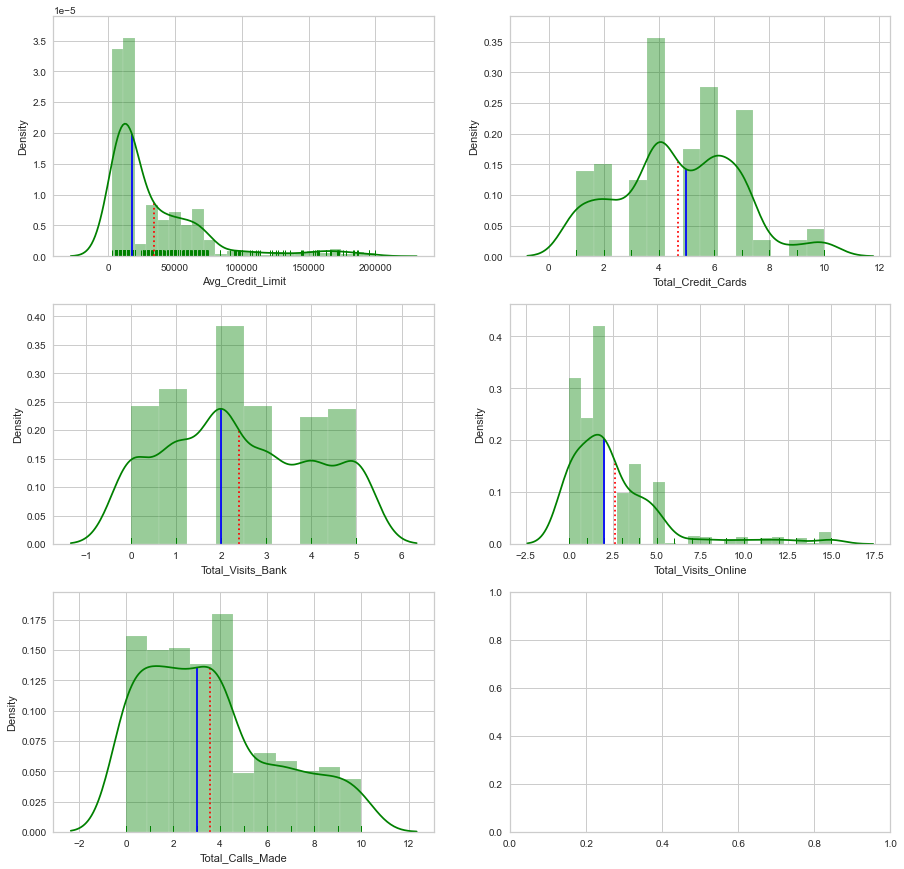

<IPython.core.display.Javascript object>

In [9]:
# plotting histograms for all numerical variables.

# List of numerical varaibles.
numerical_col = dfAllLife.select_dtypes(include=np.number).columns.tolist()
# A plot with 3 rows and 2 columns, both zero indexed.
# Row i and Column j represented by axes[i,j] will represnt one histogram
# For example the 4th numerical variabble from numerical_col will have an index equal to 3
# int(3/2)=1 and 3%2=1(the rest) that will be in second row  and second column
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
for i in range(len(numerical_col)):
    ax = sns.distplot(
        ax=axes[int(i / 2), i % 2],
        x=dfAllLife[numerical_col[i]],
        color="green",
        rug=True,
        axlabel=numerical_col[i],
    )
    line = ax.lines[0]
    xs = line.get_xdata()
    ys = line.get_ydata()
    # Plotting a dotted  red line for the mean after calculting the mean and the height of the line
    mean = dfAllLife[numerical_col[i]].mean()
    height_mean = np.interp(mean, xs, ys)
    ax.vlines(mean, 0, height_mean, color="red", ls="dotted")
    # Plotting a solid blue line for the median after calculting the median and the height of the line
    median = dfAllLife[numerical_col[i]].median()
    height_median = np.interp(median, xs, ys)
    ax.vlines(median, 0, height_median, color="blue", ls="solid")

**Observations**
- Total_Credit_Cards is negatively skewed where the mean is less than the median.
- The rest of variables distribution is positively skewed where the mean is higher than the median.
- 4 has the highest count among all observations for Total_Calls_Made and Total_Credit_Cards.
- 2 has the highest count among all observations for Total_Visits_Bank and Total_Visits_Online.

#### Investigating outliers in every numerical column

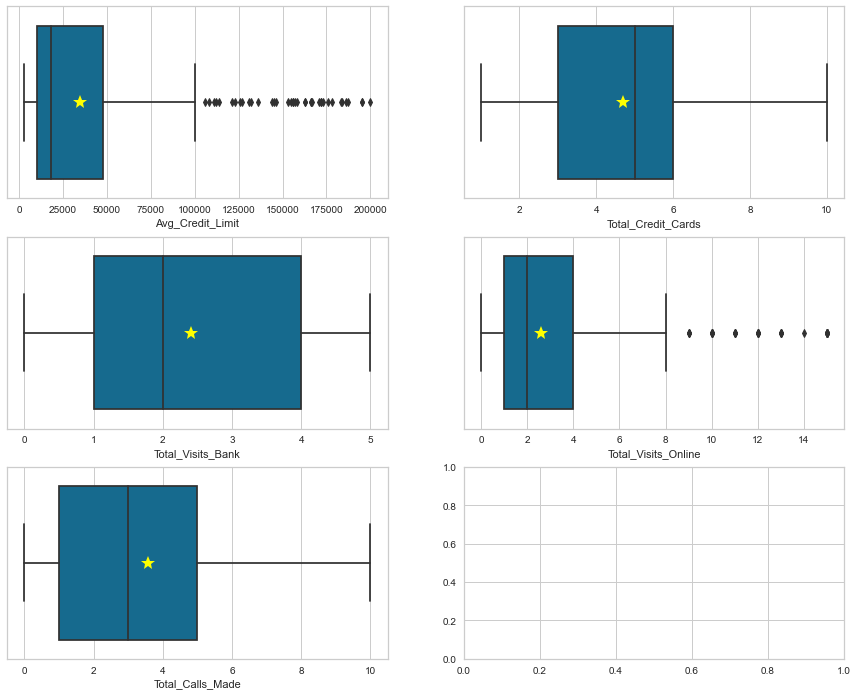

<IPython.core.display.Javascript object>

In [10]:
# outlier detection using boxplot
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
# A plot with 7 rows and 2 columns, both zero indexed.
# Row i and Column j represented by axes[i,j] will represnt one boxplot
# For example the 5th numerical variabble from numerical_col here is monthlyIncome will have an index equal to 4
# int(4/2)=2 and 4%2=0(the rest) that will be in row index number 2(third row) and column index number 0(first column)

for i in range(len(numerical_col)):
    sns.boxplot(
        ax=axes[int(i / 2), i % 2],
        data=dfAllLife,
        x=dfAllLife[
            numerical_col[i]
        ],  # Plotting the mean on theboxplot as a yellow star with a black edge
        showmeans=True,
        meanprops={
            "marker": "*",
            "markerfacecolor": "yellow",
            "markeredgecolor": "black",
            "markersize": "15",
        },
    )

**Observations**
* Total_Credit_Cards, Total_Visit_Bank, Total_Calls_Made have no outliers.
* Total_Visits_Online has upper outliers, however we won't treat these as outliers since a customer can log to his online banking for upp to 15 times per year.
* Average_Credit_Limit has upper outliers,however we won't treat these as outliers since customers with excellent credit scores can have these high values which are more than 100K. Also we can observe from Average_Credit_Limit boxplot that there are many data points that are spread from 100k to 200k. If there were few points concentrated around a high value then we can treat these as outliers.

#### Distribution of  Total Variables (Total_Credit_Cards,Total_Visits_Bank,Total_Calls_Made,Total_Visits_Online)

In [11]:
# Function to add the percentage of each class of the category
def perc_on_bar(plot, feature):
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage

<IPython.core.display.Javascript object>

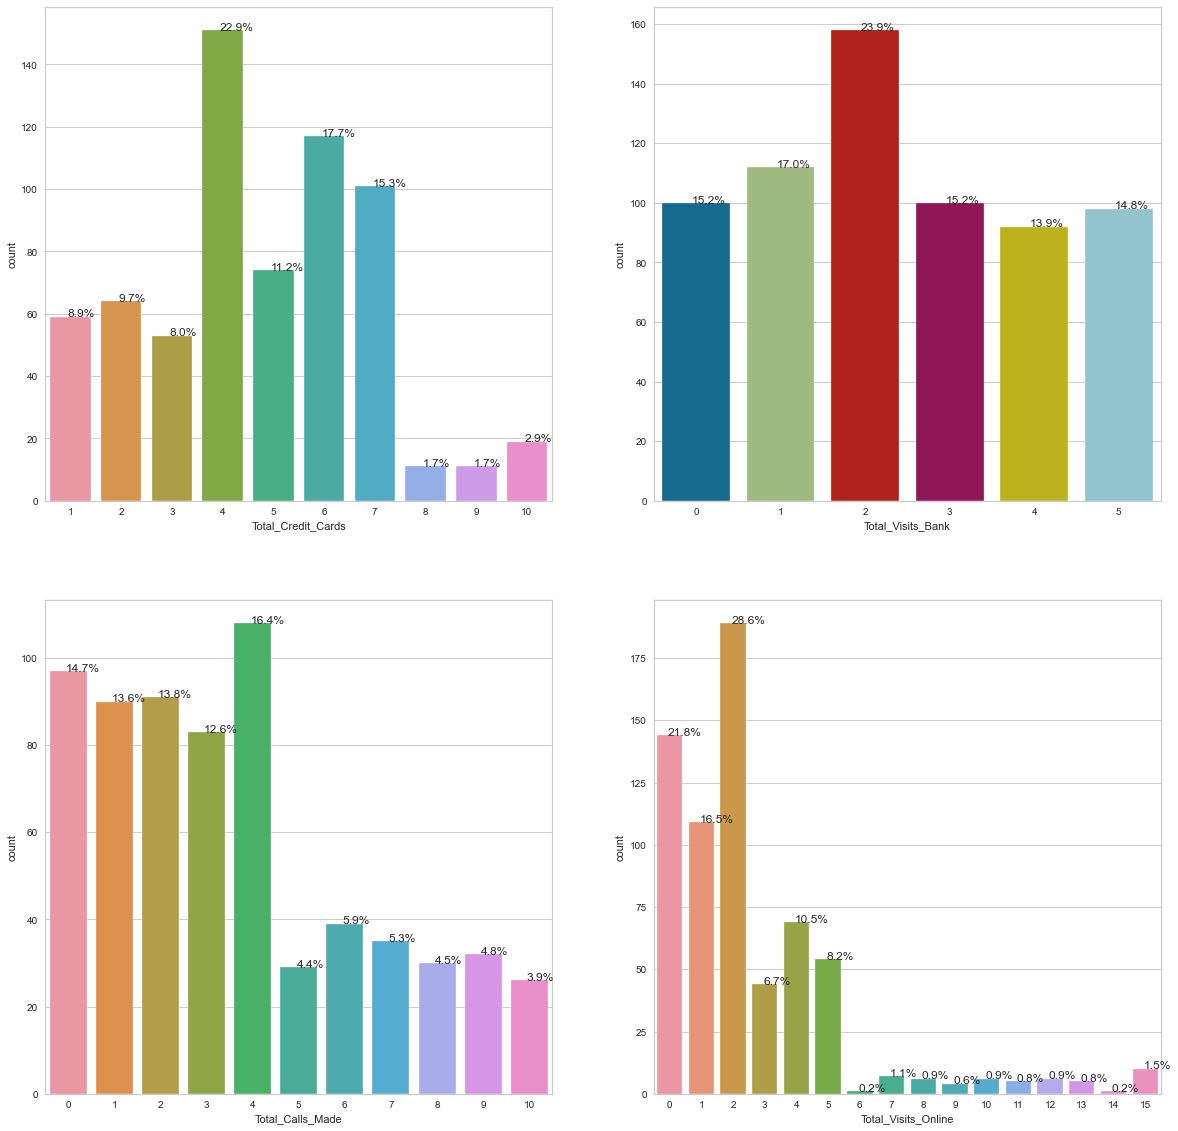

<IPython.core.display.Javascript object>

In [12]:
# Plotting barplots for total numerical variables.
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
# A plot with 2 rows and 2 columns, both zero indexed.
# Row i and Column j represented by axes[i,j] will represnt one boxplot
# For example the 3th  variable from categorical_col here is Gender will have an index equal to 2
# int(2/2)=1 and 2%2=0(the rest) that will be in row number 1(second row) and column number 0(first column)
total_variables = [
    "Total_Credit_Cards",
    "Total_Visits_Bank",
    "Total_Calls_Made",
    "Total_Visits_Online",
]
for i in range(len(total_variables)):
    ax = sns.countplot(
        ax=axes[int(i / 2), i % 2], data=dfAllLife, x=dfAllLife[total_variables[i]]
    )
    perc_on_bar(ax, dfAllLife[total_variables[i]])

**Observations** .
* Most of the customers have a total of 4 credit cards(22.9%), then second customers that have 6 credit cards (17.7%), then third customers that have 7 credit cards(15.3%).
* The majority of customers visit the banks in person twice a year(23.9%), then 17% of the customers visit the bank once a year, then 15.2% visit the bank 0 or 3 times, then 14.8% of the customers visit gthe bank 5 times a year. 13.9% visit the bank 4 times a year.
* The majority of customers(71.7%) calls the banks<= 4 times a year, where the top count goes for calling the bank for 4 times(16.4% of the customers)
* The majority of customers(92.3%) visit the online banking  <= 5 times a year, where the top count goes for logging to the online banking for two times(28.6% of the customers)

### Bivariate Analysis

#### Relationship between numerical variables using pair plots and correlation plots 

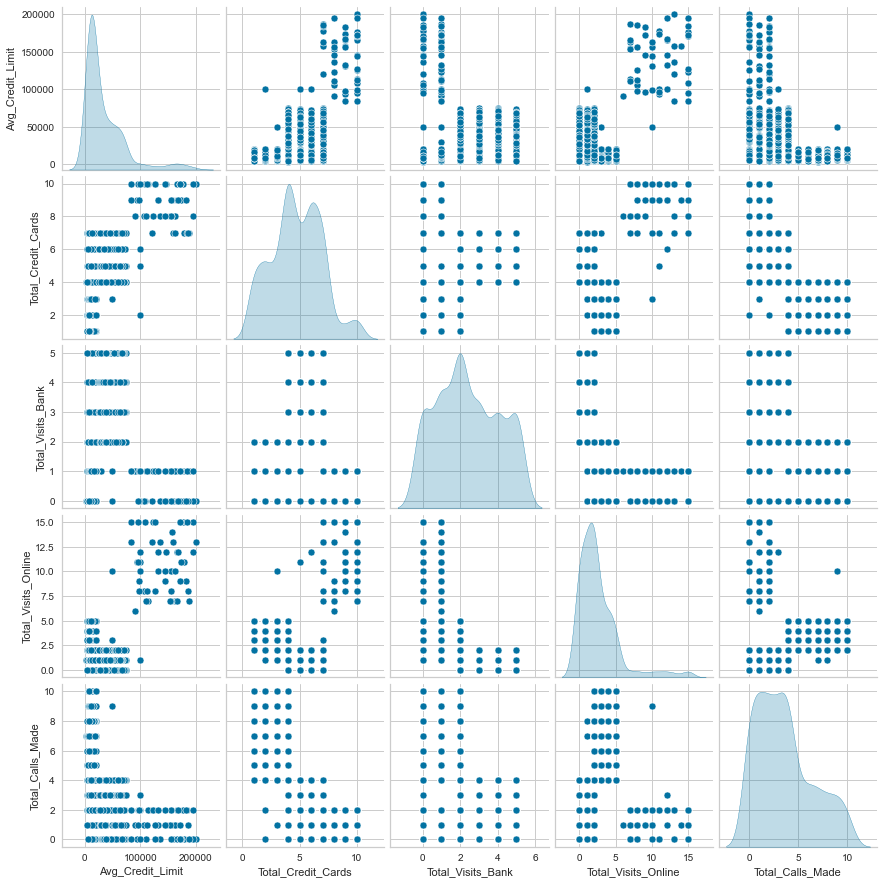

<IPython.core.display.Javascript object>

In [13]:
# pairplot: Visualize pairwise relationship in the dataset.
sns.pairplot(dfAllLife, diag_kind="kde")

**Observations**
- Distribution of Total_Credit_Cards is Multinomial(3 peaks).
- Distribution of Total_Visits_Bank is Multinomial(3 peaks).
- Distribution of Total_Calls_Made seems to be Binomial(2 peaks).

<AxesSubplot:>

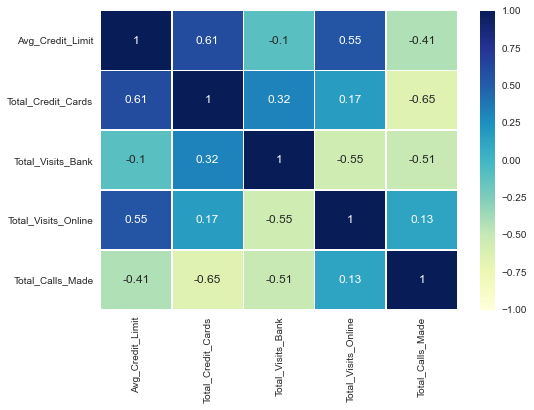

<IPython.core.display.Javascript object>

In [14]:
# heatmap: Plot rectangular data as a color-encoded matrix, where each cell represents the correlation between
# the two corresponding quantitative attributes
sns.heatmap(
    dfAllLife.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cmap="YlGnBu",
    vmin=-1,
    vmax=1,
)

**Observations**
* There is a positive correlation between Avg_Credit_Limit and Total_Credit_Cards(61%) which is expected.
* There is a positive correlation between Avg_Credit_Limit and total_Visits_Online(55%).
* There is a positive correlation between Total_Credit_Cards and Total_Visits_Bank(32%).
* There is a negative correlation between Total_Credit_Cards and Total_Calls_Made(-65%).
* As expected ,there is a negative correlation between Total_Visits_Bank and:
    - Total_Visits_Online(-55%).
    - Total_Calls_Made(-51%).
* There is a negative correlation between Avg_Credit_Limit and Total_Calls_Made(-41%).

####  Avg_Credit_Limit vs Total_Credit_Cards

<AxesSubplot:xlabel='Total_Credit_Cards', ylabel='Avg_Credit_Limit'>

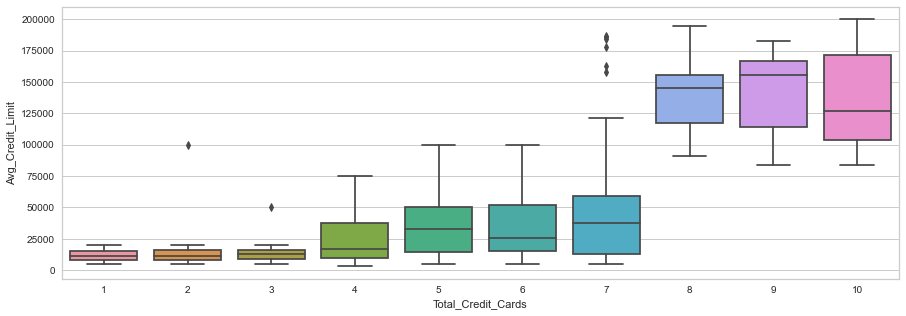

<IPython.core.display.Javascript object>

In [15]:
# looking at this relationship in a boxplot graph
plt.figure(figsize=(15, 5))
sns.boxplot(y="Avg_Credit_Limit", x="Total_Credit_Cards", data=dfAllLife)

**Observations**
- We can observe three major groups\segemnts:
    - Customers with 1,2,3, and 4 credit cards have a low  median Avg_Credit_Limit(the lowest).
    - Customers with 5,6, and 7 credit cards have a moderate median Avg_Credit_Limit.
    - Customers with 8,9, and 10 credit cards have a high median Avg_Credit_Limit(the highest).
- Overall as the number of Total_Credit_Cards increases the median of Avg_Credit_Limit increases, this confirms the high positive correlation between Avg_Credit_Limit and Total_Credit_Cards.

####  Avg_Credit_Limit vs Total_Visits_Bank

<AxesSubplot:xlabel='Total_Visits_Bank', ylabel='Avg_Credit_Limit'>

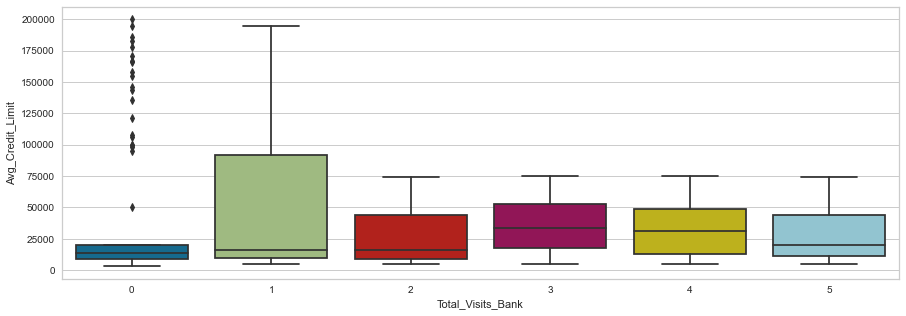

<IPython.core.display.Javascript object>

In [16]:
# looking at this relationship in a boxplot graph
plt.figure(figsize=(15, 5))
sns.boxplot(y="Avg_Credit_Limit", x="Total_Visits_Bank", data=dfAllLife)

**Observations**
- The range of Avg_Credit_Limit is the highest for low values of total_Visits_Bank, these values are 0, and 1. However the median of Avg_Credit_Limit is the highest for customers that visit the bank 3 or 4 times.
- We notice a similar Avg_Credit_Limit distrubution for customers visiting the bank for 2 and 5 times.

#### Avg_Credit_Limit vs Total_Visits_Online

<AxesSubplot:xlabel='Total_Visits_Online', ylabel='Avg_Credit_Limit'>

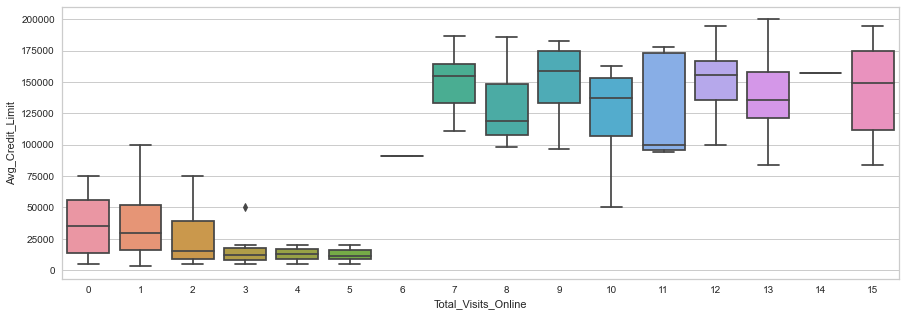

<IPython.core.display.Javascript object>

In [17]:
# looking at this relationship in a boxplot graph
plt.figure(figsize=(15, 5))
sns.boxplot(y="Avg_Credit_Limit", x="Total_Visits_Online", data=dfAllLife)

**Observations**
- We observe two major groups, Customers that do online banking for >= 6 times have a way higher median and maximum values of Total_Credit_Cards that customers that do online banking for less than 6 times.

#### Avg_Credit_Limit vs Total_Calls_Made

<AxesSubplot:xlabel='Total_Calls_Made', ylabel='Avg_Credit_Limit'>

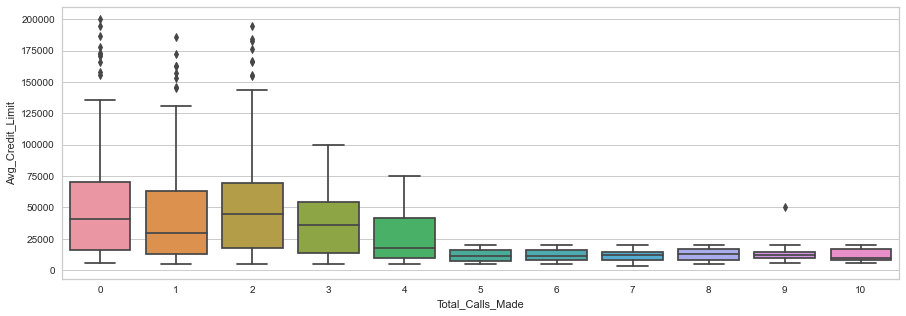

<IPython.core.display.Javascript object>

In [18]:
# looking at this relationship in a boxplot graph
plt.figure(figsize=(15, 5))
sns.boxplot(y="Avg_Credit_Limit", x="Total_Calls_Made", data=dfAllLife)

**Observations**
- We can observe two groups, customers that call the bank 5 or more times have a similar Total_Credit_Cards distribution with a median that is lower than the one for customers that call the bank less that 5 times.
- Overall customers that call the bank at least 5 times have a lower credit limit than customers that call the bank less than 5 times.

#### Total_Visits_Bank vs Total_Credit_Cards

<AxesSubplot:xlabel='Total_Credit_Cards', ylabel='Total_Visits_Bank'>

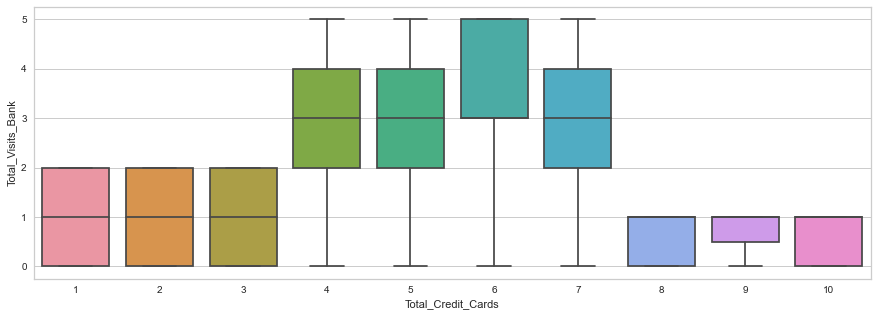

<IPython.core.display.Javascript object>

In [19]:
# looking at this relationship in a boxplot graph
plt.figure(figsize=(15, 5))
sns.boxplot(y="Total_Visits_Bank", x="Total_Credit_Cards", data=dfAllLife)

**Observations**
- We can observe three major groups:
    - customers that have 4,5,6, or 7 credit cards visit the bank more frequently than customers with differnet                       Total_Credit_Cards count with a median of Total_Visits_Bank >=3. 
    - Customers with at least 8 credit cards visit have the minimum bank visits frequency with 1 being the maximum number of         visits.
    - Customers with at most 3 credit cards visit the bank at most 2 times.

#### Total_Visits_Online vs Total_Credit_Cards

<AxesSubplot:xlabel='Total_Credit_Cards', ylabel='Total_Visits_Online'>

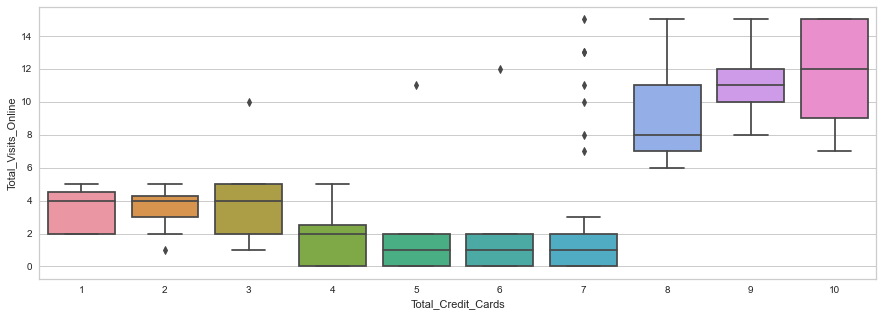

<IPython.core.display.Javascript object>

In [20]:
# looking at this relationship in a boxplot graph
plt.figure(figsize=(15, 5))
sns.boxplot(y="Total_Visits_Online", x="Total_Credit_Cards", data=dfAllLife)

**Observations**
- We can observe three major groups, the first is customers that have 4,5,6 or 7 credit cards have the lowest median for total_Visits_Online, then the second lowest is for customers that have 1,2, or 3 credit cards, the highest count of online banking(between 8 and 15 times) is for customers that have 8,9, or 10 credir cards.  

#### Total_Calls_Made vs Total_Credit_Cards

<AxesSubplot:xlabel='Total_Credit_Cards', ylabel='Total_Calls_Made'>

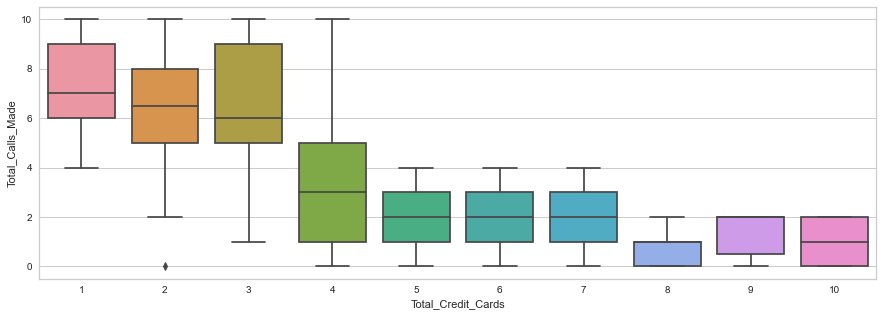

<IPython.core.display.Javascript object>

In [21]:
# looking at this relationship in a boxplot graph
plt.figure(figsize=(15, 5))
sns.boxplot(y="Total_Calls_Made", x="Total_Credit_Cards", data=dfAllLife)

**Observations**
- We can oberve three groups, customers that have more than 8 credit cards have the lowest median of Total_Calls_Made. then comes customers with credit cards ranging from 4 to 7, customers that have 1,2, or 3 credit cards have the highest median of Total_Calls_Made.

#### Total_Visits_Bank vs Total_Visits_Online

<AxesSubplot:xlabel='Total_Visits_Online', ylabel='Total_Visits_Bank'>

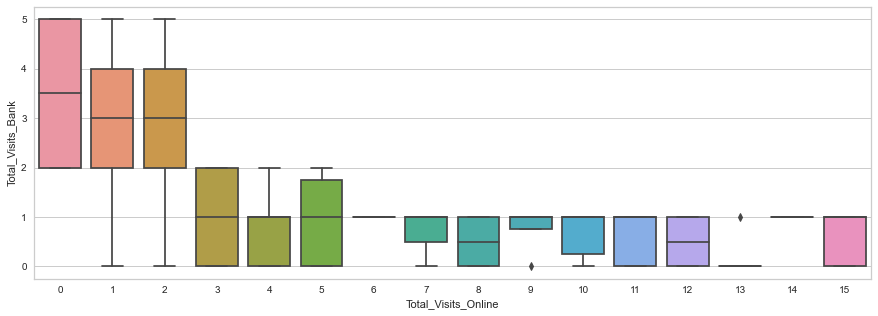

<IPython.core.display.Javascript object>

In [22]:
# looking at this relationship in a boxplot graph
plt.figure(figsize=(15, 5))
sns.boxplot(y="Total_Visits_Bank", x="Total_Visits_Online", data=dfAllLife)

**Observations**
- We observe three major groups, Customers with the highest median of Total_Visits_Bank do online banking 0,1, or 2 times. Then comes next customers that do online banking ranging from 3 to 5, then comes customers that do online banking more than 5 times.

#### Total_Visits_Bank vs Total_Calls_Made

<AxesSubplot:xlabel='Total_Calls_Made', ylabel='Total_Visits_Bank'>

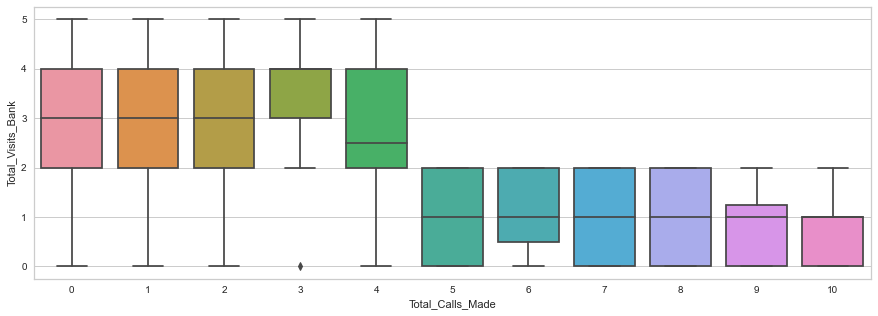

<IPython.core.display.Javascript object>

In [23]:
# looking at this relationship in a boxplot graph
plt.figure(figsize=(15, 5))
sns.boxplot(y="Total_Visits_Bank", x="Total_Calls_Made", data=dfAllLife)

**Observations**
- We can observe two major groups, customers that call the bank at most 4 times have a higher range and a higher median of Total_Visits_Bank than customers that call the bank more than 4 times.

####  Total_Calls_Made vs Total_Visits_Online

<AxesSubplot:xlabel='Total_Visits_Online', ylabel='Total_Calls_Made'>

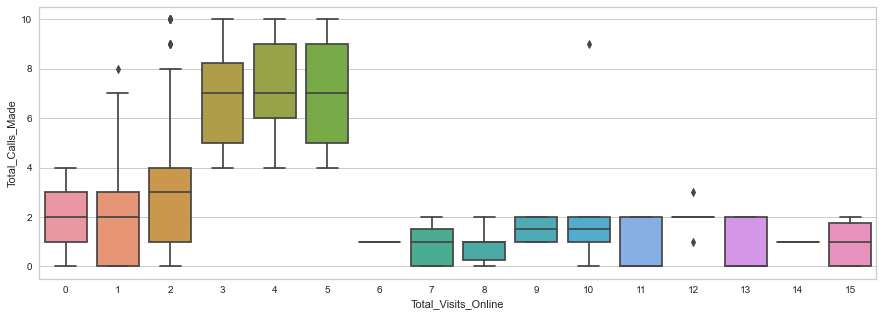

<IPython.core.display.Javascript object>

In [24]:
# looking at this relationship in a boxplot graph
plt.figure(figsize=(15, 5))
sns.boxplot(y="Total_Calls_Made", x="Total_Visits_Online", data=dfAllLife)

**Observations**
- We clearly observe three groups. Customers that do online banking at most two times have the second lowest median for Total_Calls_Made, then customers that do online banking between 3 and 5 times have the highest calls made to the bank. Customers that do online banking at least 7 times have the lowest median and the lowest maximum of Total_Calls_Made

### EDA Insights

- The Average Credit Limit ranges between 3k and 200K.
- Most of the customers have a total of 4 credit cards(22.9%), then second customers that have 6 credit cards (17.7%), then       third customers that have 7 credit cards(15.3%). The number of credit cards ranges between 1 and 10.
- The majority of customers visit the banks in person twice a year(23.9%), then 17% of the customers visit the bank once a       year, then 15.2% visit the bank 0 or 3 times, then 14.8% of the customers visit gthe bank 5 times a year. 13.9% visit the       bank 4 times a year. The number of in person visit to the bank per year ranges between 0 and 5.
- The majority of customers(71.7%) calls the banks<= 4 times a year, where the top count goes for calling the bank for 4         times(16.4% of the customers). The range of the total calls made by customer per year ranges between 0 and 10.
- The majority of customers(92.3%) visit the online banking  <= 5 times a year, where the top count goes for logging to the        online banking  for two times(28.6% of the customers). The range of online banking per year ranges between 0 and 15.
- There is a positive correlation between Avg_Credit_Limit and Total_Credit_Cards as the number of Total_Credit_Cards increases   the median of Avg_Credit_Limit increases
- The range of Avg_Credit_Limit is the highest for low values of total_Visits_Bank, these values are 0, and 1 and is the         highest for customers that visit the bank 3 or 4 times.
- Customers that do online banking for >= 6 times have a way higher median of Total_Credit_Cards that customers that do online   banking for less than 6 times.
- Customers that call the bank at least 5 times have a lower credit limit than customers that call the bank less than 5 times.
- Customers that have Total_Credit_Cards ranging from 4 to 7 credit cards visit the bank more frequently than other customers.
- Customers that do online banking more than 8 times have at least 8 credit cards and have the lowest calls made to the bank.
- There is a negative correlation between Total_Visits_Bank and Total_Visits_Online and Total_Calls_Made.
- Overall Customers that do online banking at least 7 times have the lowest Total_Calls_Made, then customers that do online banking at most two times. Customers that do online banking between 3 and 5 times have the highest Total_Calls_Made.
- We can notice that multiple variables can divide the customers into 3 groups, this can be a hint for the proper number of clusters: k, it seems like k can't be less than 3.

### Data Preparation

In [25]:
# Scaling the data set before clustering
scaler = StandardScaler()
scaled = scaler.fit_transform(dfAllLife)

<IPython.core.display.Javascript object>

In [26]:
# Creating a dataframe from the scaled data
dfScaled = pd.DataFrame(scaled, columns=dfAllLife.columns)
dfScaled.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593
6,1.740187,0.135694,-1.473731,2.861408,-0.553005
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326


<IPython.core.display.Javascript object>

**Observations**
- Data is scaled and ready for clustering.

## K-means Clustering
- **It is a Centroid based clustering . The objective is to find K clusters/groups.**
- **The way these groups are defined is by creating a centroid for each group.** 
- **The centroids are like the heart of the cluster, they “capture” the points closest to them and add them to the cluster.** 

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9427240005784551
Number of Clusters: 7 	Average Distortion: 0.9095661498049182
Number of Clusters: 8 	Average Distortion: 0.8930059645047463
Number of Clusters: 9 	Average Distortion: 0.8580883332843734


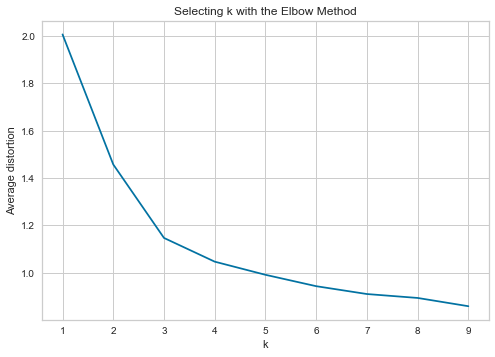

<IPython.core.display.Javascript object>

In [27]:
# Range of clusters from 1 to 9 to be fed to K-means clustering algorithm
clusters = range(1, 10)
# list to store the average distortion for each k clusters.
meanDistortions = []

for k in clusters:
    # create the K-means model with k clusters
    model = KMeans(n_clusters=k)
    # fitting the scaled data to the K-means moldel
    model.fit(dfScaled)
    # predict the closest cluster each sample in dfScaled belongs to
    prediction = model.predict(dfScaled)
    # computing the average distortion
    distortion = (
        sum(np.min(cdist(dfScaled, model.cluster_centers_, "euclidean"), axis=1))
        / dfScaled.shape[0]
    )
    # adding the distortion of the current K-means with k clusters to the list
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)
# Plotting the average distorion for each k clusters K-means model
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

##### **Observations**
- The appropriate value of k from the elbow curve seems to be 3,4, 6, or 7.
- Let's check the **silhouette scores** to determine the best k value.

For n_clusters = 2, silhouette score is 0.4184249666322083
For n_clusters = 3, silhouette score is 0.5157182558881671
For n_clusters = 4, silhouette score is 0.35566706193741826
For n_clusters = 5, silhouette score is 0.2723916744636517
For n_clusters = 6, silhouette score is 0.2554502945366703
For n_clusters = 7, silhouette score is 0.23443538156339505
For n_clusters = 8, silhouette score is 0.2269283574986872
For n_clusters = 9, silhouette score is 0.22547998554798673


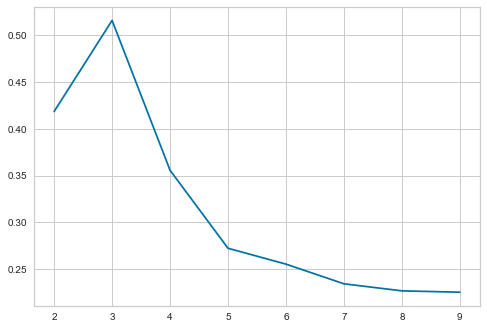

<IPython.core.display.Javascript object>

In [28]:
# list to store the silhouette score for each K-means model.
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    # Creating the K-means model with k clusters
    clusterer = KMeans(n_clusters=n_clusters)
    # Compute cluster centers and predict cluster index for each sample.
    preds = clusterer.fit_predict(dfScaled)
    # Calculating the silhouette score
    score = silhouette_score(dfScaled, preds)
    # Adding the silhouette score to the list
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
# Plotting the silhouette score as a line plot.
plt.plot(cluster_list, sil_score)

**Observations**
- From the silhouette scores, it seems that 3 is the best value of k, followed by 4.
- 6 and 7 have a low silhouette scores.
- Let's visualize and analyze the silhouette coefficients for k=3 and k=4, since even with a high silhouette score, some         clusters can have a score below the average and in that case the k with that high score shouldn't be considered.
- If it turned out that some clusters have a silhouette score below average then we can analyze other k values such as 6 or 7.

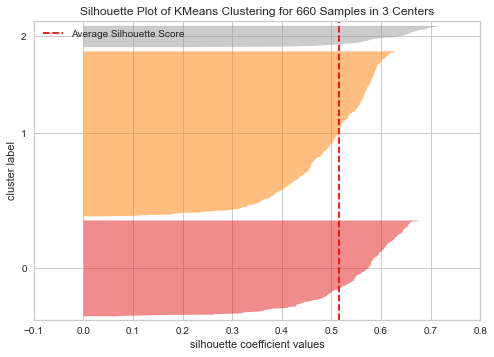

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [29]:
# Visualizing and analyzing the optimal no. of clusters as 3  with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(dfScaled)
visualizer.show()

**Observations**
- All the three clusters have a silhouette coefficient values well above the average.

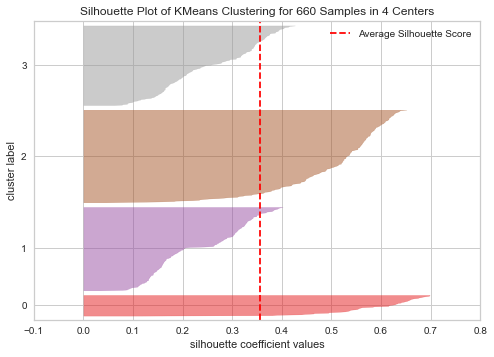

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [30]:
# Visualizing and analyzing the optimal no. of clusters as 4 with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(dfScaled)
visualizer.show()

**Observations**
- All the three clusters have a silhouette coefficient values above the average silhoette score.However cluster1 and cluster3 silhouette scores are too close to the average.
- Let's take **3 as the appropriate no. of clusters** as the silhouette score is the highest and there is knick at 3 in the elbow curve, plus the silhouette scores is well above the average silhouette score for all clusters(0,1, and 2).

### Cluster Profiling for Kmeans with 3 clusters 

In [31]:
%%time
# Creating Kmeans model with 3 clusters and fitting our scaled data to the the model
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(dfScaled)

Wall time: 35 ms


KMeans(n_clusters=3, random_state=0)

<IPython.core.display.Javascript object>

**Observations**
- It took 35 ms to build the model and to fit the data.

In [32]:
# Making a copy of the data for the Hirarchical Clustering
dfAllLifeHC = dfAllLife.copy()
# Adding kmeans cluster labels to the original dataframe
dfAllLife["K_means_segments"] = kmeans.labels_
# Grouping the data by the three differnt clusters\segments and calculating the mean of each variable\feature for every cluster
cluster_profile = dfAllLife.groupby("K_means_segments").mean()
# Adding the count of customers in each cluster
cluster_profile["count_in_each_segment"] = (
    dfAllLife.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)
# Let's display cluster profiles
cluster_profile.style.highlight_max(color="green", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,count_in_each_segment
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

**Observations**
- Cluster 0 have the highest number of customers 386 which is about ~58.5% of total customers. The customers in this segement visit the bank in person more frequentley than customers in the other two clusters.
- Cluster 1 have the second count of customers with 224 customers which is about 33.9% of total customers. The customers in this segment call the bank more frequently than customers in the other two clusters\segments.
- Cluster 3 have the least count of customers with 50 customers which is about of total customers 6.7% of total customers. The customers in this segment:
     - Visit the online banking way more frequently than customers in the other two clusters\segments.
     - Have the highest total of credit cards and the hughest Average credit limit as well.

#### Plotting the box plots for every variable for each cluster

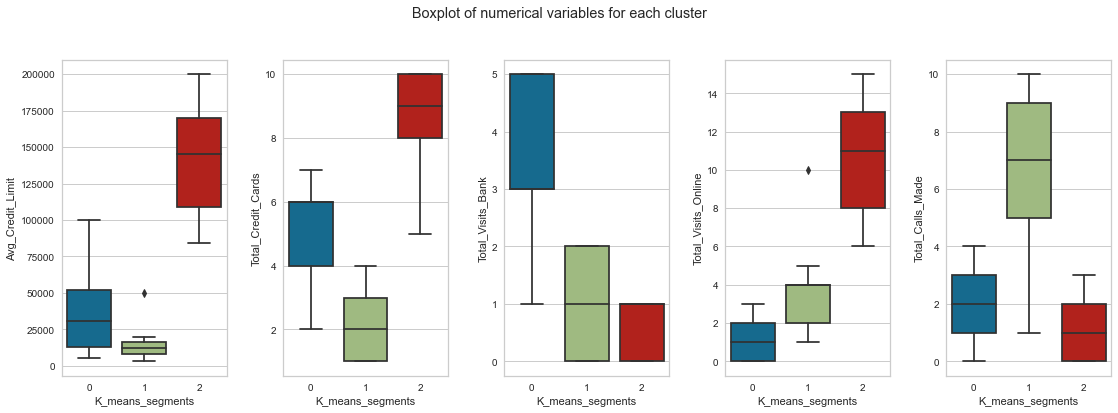

<IPython.core.display.Javascript object>

In [33]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=dfAllLife[numerical_col[counter]],
        x=dfAllLife["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Clusters Profiles'

- **Cluster 0**:
    - Average Credit Limit is between 3k and 100k with 75% of the customers in this cluster\segment have an average >= than           12.5k, and half of the customers have an average credit limit >= 50k.
    - Total_Credit_Cards range between 2 and 7 with 75% of the customers in this cluster\segment have at least 4 credit cards.
    - Total_visits_Bank range betwenn 1 and 5 with 75% of the customers in this cluster\segment visit the bannk in person for         at least 3 times.
    - Total_Visits_Online count range between 0 and 3 with 75% of the customers in this segment\cluster login <=2 times.
    - Total_Calls_Made count range between 0 and 4 with 75% of the customers in this segment\cluster calls the bank or its           customer service department <= 3times.
  - **Customers in cluster 0 have a moderate average credit limit and a moderate number of credit cards, they prefer to visit the bank in person to manage their credit cards or to solve its related issues rather than calling the bank or do onilne banking.**  


- **Cluster 1**:
    - Average Credit Limit is between 3k and about 20k with 75% of the customers in this cluster\segment have an average <=           than 15k.
    - Total_Credit_Cards range between 1 and 4 with 75% of the customers in this cluster\segment have at most 3 credit cards..
    - Total_visits_Bank range betwenn 0 and 2, customers in this cluster have a low in person bank visiting frequency.
    - Total_Visits_Online count range between 1 and 5 with 75% of the customers in this segment\cluster login <=4 times.
    - Total_Calls_Made count range between 1 and 10 with 75% of the customers in this segment\cluster calls the bank or its           customer service department at lest 5 times.
   - **Customers in cluster 1 have a low average credit limit and a low number of credit cards, they prefer to call the bank to manage their credit cards or to solve its related issues rather than visiting the bank or do online banking**

- **Cluster 2**:
    - Average Credit Limit is between ~80k and 200k with 75% of the customers in this cluster\segment have an average >=           than 110k.
    - Total_Credit_Cards range between 5 and 10 with 75% of the customers in this cluster\segment have at least 8 credit cards.
    - Total_visits_Bank range betwenn 0 and 1, customers in this cluster rarely visit the bank in person and have the lowest in       person bank visiting frequency.
    - Total_Visits_Online count range between 6 and 15 with 75% of the customers in this segment\cluster at least 8 times.
    - Total_Calls_Made count range between 0 and 3 with 75% of the customers in this segment\cluster calls the bank or its           customer service department at most 2 times.
  - **Customers in cluster 2 have a high average credit limit and a high number of credit cards, they prefer to do online banking to manage their credit cards or to solve its related issues rather than calling the bank or visiting the bank in person. The low number of visiting or calling the bank can be an indicater that their issue is being resolved in a short time**

### Analyzing the duplicated customer key

In [34]:
dfAllLifeOriginal["K_means_segments"] = kmeans.labels_
dfAllLifeOriginal[
    dfAllLifeOriginal["Customer Key"].isin([47437, 37252, 97935, 96929, 50706])
]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
4,5,47437,100000,6,0,12,3,2
48,49,37252,6000,4,0,2,8,1
104,105,97935,17000,2,1,2,10,1
332,333,47437,17000,7,3,1,0,0
391,392,96929,13000,4,5,0,0,0
398,399,96929,67000,6,2,2,2,0
411,412,50706,44000,4,5,0,2,0
432,433,37252,59000,6,2,1,2,0
541,542,50706,60000,7,5,2,2,0
632,633,97935,187000,7,1,7,0,2


<IPython.core.display.Javascript object>

**Observations**
- The bank should fix the  five customer keys that was assigned to two different customers, otherwise the same customer will be approached by the marketing team with two different even conflecting propositions, since customers with Customer key in [47437, 37252, 97935] were assigned to two different clusters.

In [35]:
# Dropping the "K_means_segments" column to keep the original copy of the data unchanged
dfAllLifeOriginal.drop(["K_means_segments"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Business Recommendations Based on KMeans Clustering

- The bank should fix the five customer keys that was assigned to two different customers, since  customers with Customer key in [47437, 37252, 97935] were assigned two different clusters and that can lead to a conflicting marketing approaches proposed  to these customers.


- **Cluster 0**: AllLife bank can offer the customers in this cluster new credit since the average and the total number of credit cards is not so high. Also the bank should pay more attention and provide more resources to this segement of customers in resolving their issues(e.g  ensuring that customer queries are resolved faster) since the number of visting the bank in person is the highest among all clusters which can be an indication that their issues is not being resolved or it is taking a long time.


- **Cluster 1**: AllLife bank should encourage the customers in this cluster to get  new credit cards since the average and the total number of credit cards is low(the lowest among all the clusters) by offering incentives and bonuses if they do. Also the bank should pay more attention and provide more resources to this segment of customers in resolving their issues since the frequency of calling the bank is way higher than the other two clusters. 


- **Cluster 2**: Customers in this segment have a high average credit limit and a high total of credit cards, also customers in this cluster have a very low frequency of visiting the bank in person and very low frequency of calling the bank indicating that their issues are being solved quickly.


- **It looks like AllLife bank is paying a greater attention and providing more resources to the customers of cluster 2 perhaps because of their high average credit limit and credit cards total number. The bank should mantain its great service to this cluster of customers and try to provide the same for the other two clusters 0 and 1 and at the same time the bank should try to increase the credit limit and the number of credit cards for customers in cluster 0 and 1 perhaps by offering incentives, bonuses, or waiving some fees. This approach should be more intensive to customers in cluster 1 since customers  in cluster 1 have the least average credit limit and the least number of cards.**.


## Hierarchical Clustering
- **It is a Connectivity based clustering which creates clusters in a hierarchical tree like structure**
- **Any type of distance measure can be used as a measure of similarity.**
- **The Cluster tree like output is called Dendogram.**

In [36]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        # Performing hierarchical/agglomerative clustering
        Z = linkage(dfScaled, metric=dm, method=lm)
        # Calculating the cophenetic distances between each observation in the hierarchical clustering defined by the linkage Z.
        c, coph_dists = cophenet(Z, pdist(dfScaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553608.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875372.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042138.
Cophenetic co

<IPython.core.display.Javascript object>

In [37]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**Let's explore ward and centroid linkage methods with Euclidean, since these two linkages are availbale only for Euclidean.**

In [38]:
# list of linkage methods
linkage_methods = ["centroid", "ward"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    # Performing hierarchical/agglomerative clustering
    Z = linkage(dfScaled, metric="euclidean", method=lm)
    # Calculating the cophenetic distances between each observation in the hierarchical clustering defined by the linkage Z.
    c, coph_dists = cophenet(Z, pdist(dfScaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.


<IPython.core.display.Javascript object>

In [39]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation between centroid & ward linkage is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation between centroid & ward linkage is 0.8939385846326323, which is obtained with centroid linkage.


<IPython.core.display.Javascript object>

**Observations**

- We see that the cophenetic correlation is still maximum with Euclidean distance and average linkage with a cophenetic correlation of 0.8977...
- Let's see the dendrograms for the different linkage methods.

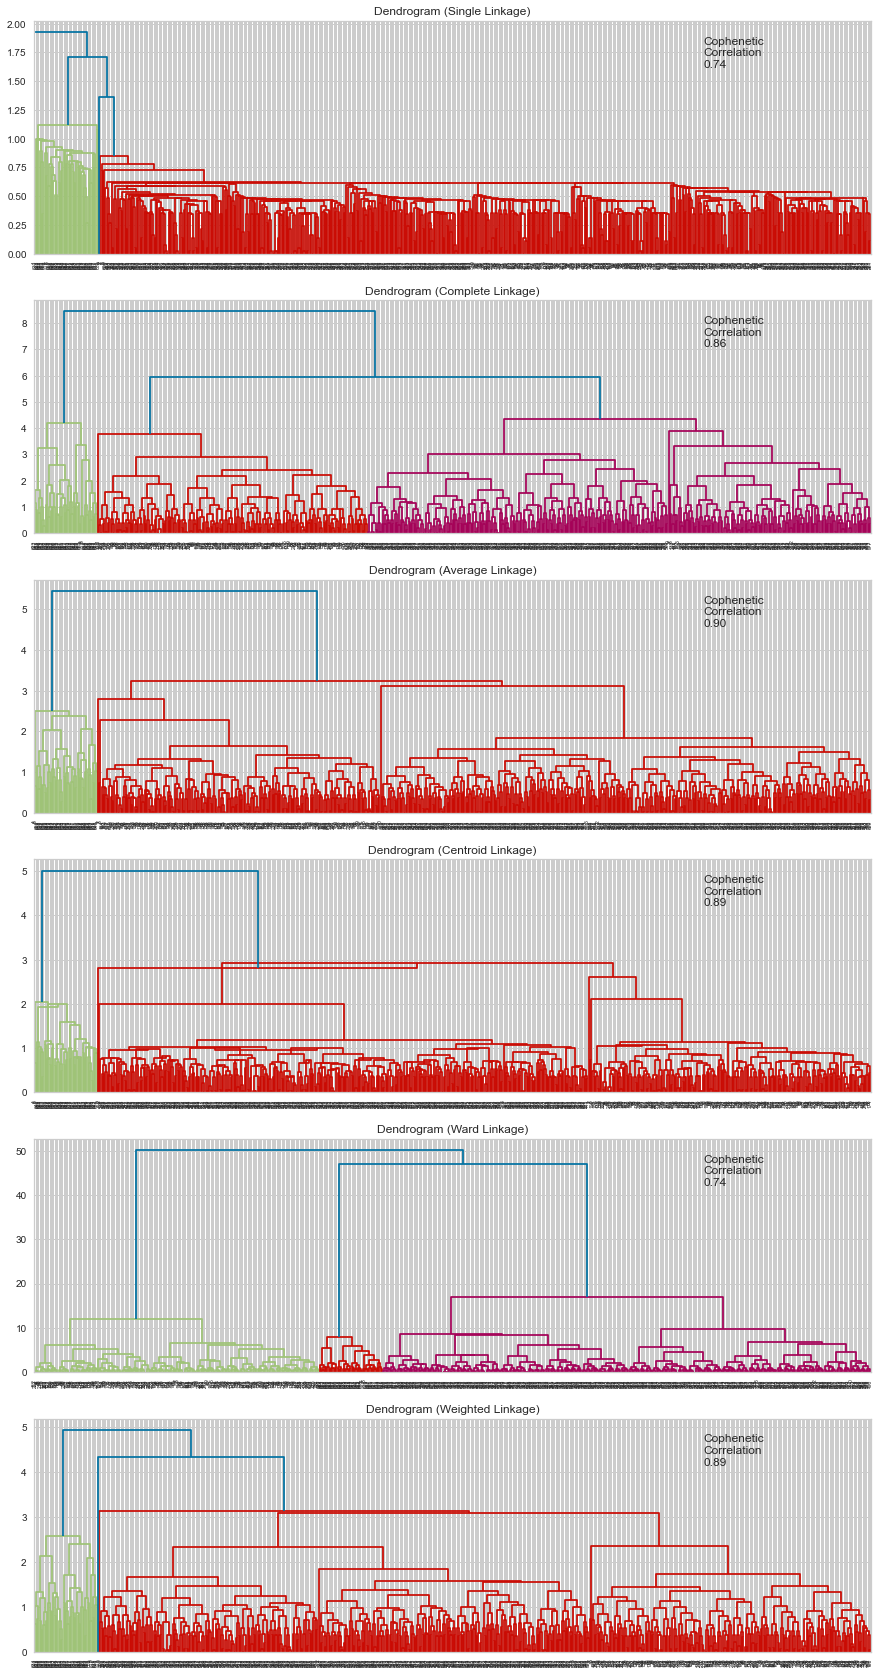

<IPython.core.display.Javascript object>

In [40]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    # Performing hierarchical/agglomerative clustering
    Z = linkage(dfScaled, metric="euclidean", method=method)
    # Plotting the hierarchical clustering as a dendrogram.
    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")
    # Calculating the cophenetic distances between each observation in the hierarchical clustering defined by the linkage Z.
    coph_corr, coph_dist = cophenet(Z, pdist(dfScaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- Itv looks like Ward linkage  has more distinct and separated clusters.
- The cophenetic correlation is highest for average linkage method.
- We will move ahead with average linkage for now and see how well the clusters were profiled.
- Let's check the best number of clusters for this method from the dendogram. The longest vertical distance without any horizontal line passing through it is represented by the left blue leg, therefore this leg\line is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters.

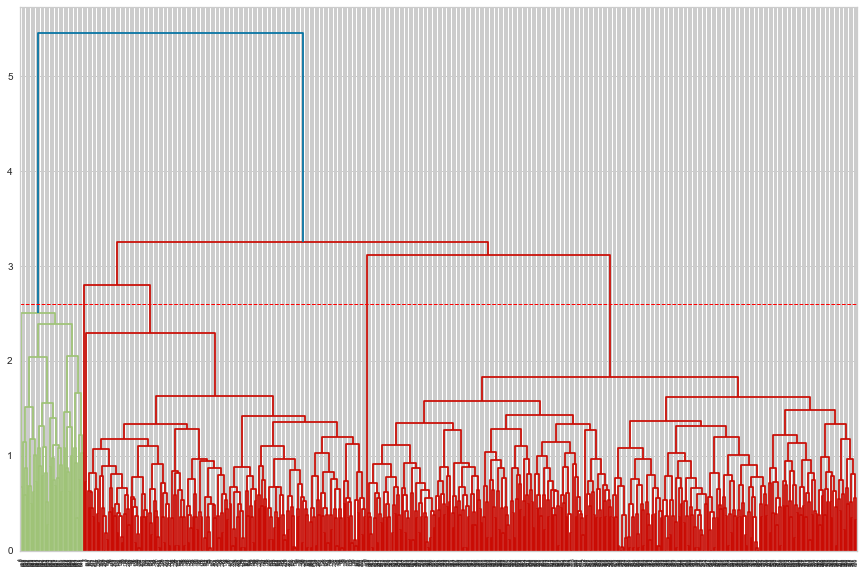

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(15, 10))
# Performing hierarchical/agglomerative clustering with all possible number of clusters(from number of observations till 1 with
# average linkage.
Z = linkage(dfScaled, metric="euclidean", method="average")
# Plotting the hierarchical clustering as a dendrogram.
dendrogram(Z)
# # Adding the horizontal line where the distance within a vertical leg is maximum without going throug horizontal line..
plt.axhline(y=2.6, c="red", lw=1, linestyle="dashed")
# Showing the graph
plt.show()

**Observations**
- We can conlude that 5 is the appropriate number of clusters since the red dotted horizontal line passes through 5 vertical lines resulting in 5 clusters.

In [42]:
%%time 
#Agglomerative Clustering with 5 clusters(we will stop when we reach 5 clusters)
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
#Fitting the data to the HCmodel
HCmodel.fit(dfScaled)

Wall time: 69.9 ms


AgglomerativeClustering(linkage='average', n_clusters=5)

<IPython.core.display.Javascript object>

**Observations**
- It took 69.9ms to build the model and to fit the data.

###  Cluster Profiling

In [43]:
# Adding kmeans cluster labels to the original dataframe
dfAllLifeHC["HC_segments"] = HCmodel.labels_
# Grouping the data by the 5 differnt clusters\segments and calculating the mean of each variable\feature for every cluster
clusterHC_profile = dfAllLifeHC.groupby("HC_segments").mean()
# Adding the count of customers in each cluster
clusterHC_profile["count_in_each_segment"] = (
    dfAllLifeHC.groupby("HC_segments")["Avg_Credit_Limit"].count().values
)
# Let's display cluster profiles
clusterHC_profile.style.highlight_max(color="green", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,count_in_each_segment
HC_segments,,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000,50
1,12027.027027,2.400901,0.932432,3.531532,6.873874,222
2,33541.450777,5.520725,3.492228,0.984456,2.010363,386
3,100000.000000,2.000000,1.000000,1.000000,0.000000,1
4,50000.000000,3.000000,0.000000,10.000000,9.000000,1


<IPython.core.display.Javascript object>

**Observations**
- Cluster 3 and cluster 4 have only 1 customer.
- **Let us try using Ward linkage(minimizes the variance of the clusters being merged) as it has more distinct and separated clusters (as seen from it's dendrogram before)**

**Figuring out the best number of clusters for the ward linkage.**
- We will use the same approach that was explained earlier(Adding the horizontal line where the distance within a vertical leg is maximum without going throug horizontal line).

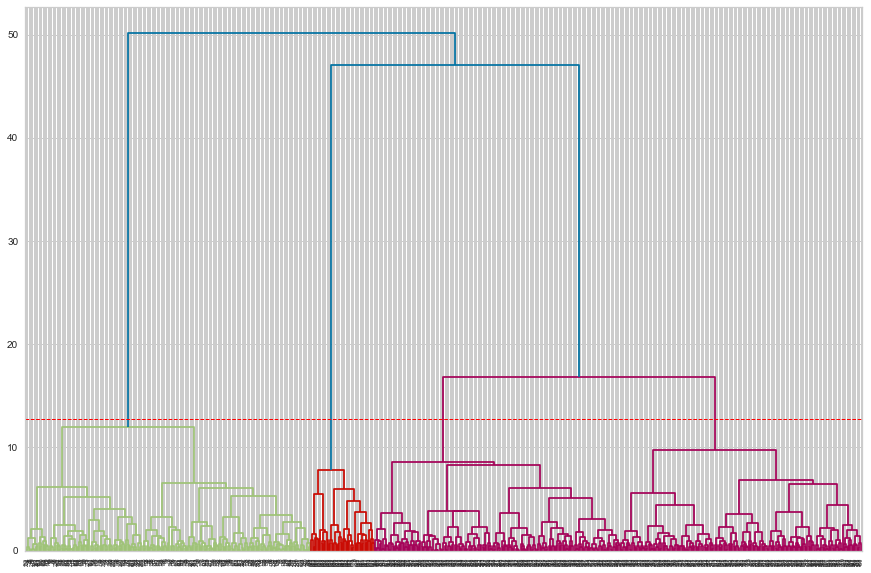

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(15, 10))
# Performing hierarchical/agglomerative clustering with all possible number of clusters(from number of observations till 1 with
# ward linkage.
Z = linkage(dfScaled, metric="euclidean", method="ward")
# Plotting the hierarchical clustering as a dendrogram.
dendrogram(Z)
# Adding the horizontal line where the distance within a vertical leg is maximum without going throug horizontal line.
plt.axhline(y=12.7, c="red", lw=1, linestyle="dashed")
# Showing the graph
plt.show()

**Observations**
- We can conlude that 4 is the appropriate number of clusters since the red dotted  horizontal line passes through 4 vertical lines resulting in 4 clusters.

In [45]:
%%time 
# Agglomerative Clustering with 4 clusters, ward linkage and euclidean as the metric used to compute 
# the linkage (we will stop when we reach 4 clusters)
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(dfScaled)
#### Calculting the silhouette score for the Agglomerative clustering
print(silhouette_score(dfScaled, HCmodel.labels_, metric="euclidean"))

0.34808225812635757
Wall time: 210 ms


<IPython.core.display.Javascript object>

**Observations**
- It took 210ms to create the model and fit the data.

### Cluster Profiling

In [46]:
# Adding kmeans cluster labels to the original dataframe
dfAllLifeHC["HC_segments"] = HCmodel.labels_
# Grouping the data by the 5 differnt clusters\segments and calculating the mean of each variable\feature for every cluster
clusterHC_profile = dfAllLifeHC.groupby("HC_segments").mean()
# Adding the count of customers in each cluster
clusterHC_profile["count_in_each_segment"] = (
    dfAllLifeHC.groupby("HC_segments")["Avg_Credit_Limit"].count().values
)
# Let's display cluster profiles
clusterHC_profile.style.highlight_max(color="green", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,count_in_each_segment
HC_segments,,,,,,
0,12151.111111,2.422222,0.937778,3.546667,6.857778,225
1,38298.429319,5.670157,2.523560,0.947644,2.099476,191
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,29474.226804,5.365979,4.448454,1.010309,1.891753,194


<IPython.core.display.Javascript object>

**Observations**
- Now there isn't a cluster with a single customer. Cluster 2 have the minimum number of customers which is 50.
- Cluster 0 have the highest number of customers 225 which is about34% of total customers. The customers in this segement call the bank way more frequentley than customers in the other three clusters.
- Cluster 1 have the third count of customers with 191 which is about 28.9% of total customers. The customers in this segment when compared to other 3 clusters have:
     - The second average value Credit limit, total number of cards. total visits to the bank, and  total calls made to the            bank.
     - The least average of total visits online.
- Cluster 2 have the least count of customers with 50 customers which is about of total customers 6.7% of total customers. The customers in this segment:
     - Visit the online banking way more frequently than customers in the other two clusters\segments.
     - Have the highest total of credit cards and the hughest Average credit limit as well.
- Cluster 3 have the second count of customers with 194 which is about 29.4% of total customers. the customers in this cluster have by far the highest average of in person bank visits when compared to the other 3 clusters
- Cluster 3 and cluster 1 have a comparable median values for all variables except the Total_Visits_Bank.

#### Plotting the box plots for every variable for each cluster

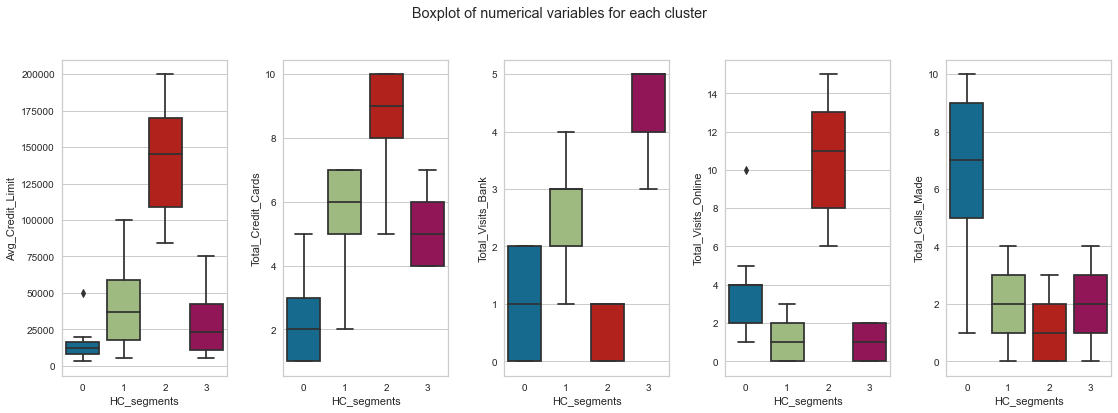

<IPython.core.display.Javascript object>

In [47]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=dfAllLifeHC[numerical_col[counter]],
        x=dfAllLifeHC["HC_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Clusters Profiles'

- **Cluster 0**:
    - Average Credit Limit is between 3k and about 20k with 75% of the customers in this cluster\segment have an average <=         than ~15k.
    - Total_Credit_Cards range between 1 and 5 with 75% of the customers in this cluster\segment have at most 3 credit cards.
    - Total_visits_Bank range between 0 and 2.
    - Total_Visits_Online count range between 1 and 5 with 75% of the customers in this segment\cluster login <=4 times.
    - Total_Calls_Made count range between 1 and 10 with 75% of the customers in this segment\cluster calls the bank or its           customer service department at least 5 times.
  - **Customers in cluster 0 have a very low average credit limit and a very low number of credit cards, they prefer to call the bank to manage their credit cards or to solve its related issues rather than visiting the bank or doing onilne banking.**  


- **Cluster 1**:
    - Average Credit Limit is between 3k and 100k with 75% of the customers in this cluster\segment have an average <=           than about 65k.
    - Total_Credit_Cards range between 2 and 7 with 75% of the customers in this cluster\segment have at least 5 credit cards.
    - Total_Visits_Bank range betwenn 1 and 4 with 75% of the customers visit the bank at most 3 times.
    - Total_Visits_Online count range between 0 and 3 with 75% of the customers in this segment\cluster login <=2 times.
    - Total_Calls_Made count range between 0 and 4 with 75% of the customers in this segment\cluster calls the bank or its           customer service department at most 3 times.
   - **Customers in cluster 1 have a moderate average credit limit and a moderate number of credit cards, they prefer to call the bank or visit the bank in person to manage their credit cards or to solve its related issues rather than doing online banking**

- **Cluster 2**:
    - Average Credit Limit is between ~85k and 200k with 75% of the customers in this cluster\segment have an average >=           than ~110k.
    - Total_Credit_Cards range between 5 and 10 with 75% of the customers in this cluster\segment have at least 8 credit cards.
    - Total_visits_Bank range betwenn 0 and 1, customers in this cluster rarely visit the bank in person and have the lowest in       person bank visiting frequency.
    - Total_Visits_Online count range between 0 and 2.
    - Total_Calls_Made count range between 0 and 3 with 75% of the customers in this segment\cluster calls the bank or its           customer service department at most 2 times.
  - **Customers in cluster 2 have a high average credit limit and a high number of credit cards, they prefer to do online banking to manage their credit cards or to solve its related issues rather than calling the bank or visiting the bank in person. The low number of visiting or calling the bank can be an indicater that their issue is being resolved in a short time**
  
- **Cluster 3**:
    - Average Credit Limit is between 3k and 75k with 75% of the customers in this cluster\segment have an average <=                 than ~45k.
    - Total_Credit_Cards range between 4 and 7 with 75% of the customers in this cluster\segment have at most 7 credit cards.
    - Total_visits_Bank range betwenn 3 and 5 with 75% of the customers in this cluster\segment visit the bank at least 4             times.
    - Total_Visits_Online count range between 6 and 15 with 75% of the customers in this segment\cluster at least 8 times.
    - Total_Calls_Made count range between 0 and 3 with 75% of the customers in this segment\cluster calls the bank or its           customer service department at most 3 times.
  - **Customers in cluster 3 have a moderate average credit limit and a moderate number of credit cards, they prefer to visit the bank in person to manage their credit cards or to solve its related issues rather than calling the bank or doing online banking. Also we can notice that the customers profiles' of cluster 3 is close, or at least included in the profiles of the customers customers of cluster 1**

### Analyzing the duplicated Customer Key

In [48]:
dfAllLifeOriginal["HC_segments"] = kmeans.labels_
dfAllLifeOriginal[
    dfAllLifeOriginal["Customer Key"].isin([47437, 37252, 97935, 96929, 50706])
]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_segments
4,5,47437,100000,6,0,12,3,2
48,49,37252,6000,4,0,2,8,1
104,105,97935,17000,2,1,2,10,1
332,333,47437,17000,7,3,1,0,0
391,392,96929,13000,4,5,0,0,0
398,399,96929,67000,6,2,2,2,0
411,412,50706,44000,4,5,0,2,0
432,433,37252,59000,6,2,1,2,0
541,542,50706,60000,7,5,2,2,0
632,633,97935,187000,7,1,7,0,2


<IPython.core.display.Javascript object>

**Observations**
- The bank should fix the  five customer keys that was assigned to two different customers, otherwise the same customer will be approached by the marketing team with two differnt even conflecting propositions, since  customers with Customer key in [47437, 37252, 97935] were assigned to two different clusters.

In [49]:
# Dropping the "HC_segments" column to keep the original copy of the data unchanged.
dfAllLifeOriginal.drop(["HC_segments"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Business Recommendations Based on  Agglomerative  Clustering

- The bank should fix the five customer keys that was assigned to two different customers, since  customers with Customer key in [47437, 37252, 97935] were assigned two different clusters and that can lead to a conflicting marketing approaches proposed  to these customers.


- **Cluster 0**: AllLife bank should offer the customers in this cluster new credit cards with a higher credit limit when it is possible since the average and the total number of credit cards is very low perhaps  by offering incentives, bonuses, lower fees if they do. Also the bank should pay more attention and provide more resources to this segement of customers in resolving their issues since the average of the number calls made to the bank is really high.


- **Cluster 1**: AllLife bank should encourage the customers in this cluster to get  new credit cards since the average of the total number of credit cards is not that high. Also the bank should pay more attention and provide more resources to this segment of customers in resolving their issues since the average of visiting the bank and the the average of calls made to the bank is the second highest among all clusters. 


- **Cluster 2**: Customers in this segment have a high average credit limit and a high total of credit cards, also customers in this cluster have a very low frequency of visiting the bank in person and very low frequency of calling the bank indicating that their issues are being solved quickly.

- **Cluster 3**: Customers in this segment have a low average credit limit(comes second as lowest average credit limit) the bank should encourage them to increase the credit limit or to get new credit cards with higher credit limit offer the customers in this cluster new credit cards with a higher credit limit.Also the bank should pay more attention and provide more resources to this segement of customers in resolving their issues since the average of visiting the bank in person is way the highest when compared to other clusters.


- **It looks like AllLife bank is paying a greater attention and providing more resources to the customers of cluster 2 perhaps because of their high average credit limit and credit cards total number. The bank should mantain its great service to this cluster of customers and try to provide the same for the other three clusters 0, 1, and 3. At the same time the bank should try to increase the credit limit and the number of credit cards for customers in these cluters perhaps by offering incentives, bonuses, or waiving some fees. This approach should be more intensive to customers in cluster 0 since customers  in cluster 0 have the least  credit limit and the least number of cards.**.


### Comparing K-means and Agglomerative clustering

**Time Efficiency**

  - K-means was faster by 6 folds where it took 35ms compared to 210ms taken by the Agglomerative clustering. This is expected since the scaling of K-means is linear(at each iteration the number of distance computed is k*n where n is the number of observations and k is the number of clusters, in our case will be 660*3=1980 operations at each iteration), but it is quadratic for the Agglomerative clustering(at each iteration the number of distance computed is n*(n+1)/2 where n is the number of observations, in our case will be 660*661/2=218130 operations at each iteration).
  
**Silhouette scoring**

  - K-means clustering had a better silhoutte score with 0.51 compared to the 0.34 for the agglomerative clustering, this can be explained with the difference in the number of clusters. the silhouette score for K-means with 4 clusters is 0.35 which is still slightly better but comparable to the one of the agglomerative clustering.
  
**Clusters**

  - K-means gave 3 clusters and the agglomerative gave 4 clusters. The agglomerative was more granular, however we should see if these clusters were all distinct and well seperated.
       -  Cluster 2 profiles for both clustering were identical even for the number of customers which is 50 for both.
       -  The profile of Cluster 0 of the K-means is almost identical to the profile of cluster 1 of the agglomerative                   clustering except for the Total_Visits_Bank
       -  The profile of Cluster 1 of the K-means is almost identical 
           - To the profile of cluster 0 of the agglomerative clustering for all variables
           - To the profile of cluster 3 of the agglomerative clustering for the Total_Visits_Online and to the                              Total_Calls_Made.
  - We can observe that cluster 1 and cluster 3 of the agglomerative clustering are so close and even identical for some        variable such as Total_Calls_Made, also from the boxplots we can observe that for the rest of variables except                Total_Visits_Online. the range of cluster 3 is included in the range of cluster 1, the only slightly variability can be      observed in the Total_Visits_Online variable(cluster 1 range between 1 and 4, and cluster 3 ranges between 3 and 5). Hence these two clusters are really so close and therefore so similar. Hence we can merge them into a single cluster.  If we do so the new merged cluster will be almost indentical to cluster 0 of K-means, even the count of customers will be 385 for the merged clusters of the agglomerative clustering and 386 for cluster 0 of K-means. Also by doing so, beside that cluster 1 of K-means is almost similar to to cluster 0 of the agglomerative clustering as we concluded earlier, the count of the two clusters will be almost the same, cluster 1 will have 286 customers and cluster 0 will have 285 customers. Hence we can map clusters 0, 1, and 2 of the k-means to clusters 1, 0, and 2 of the agglomerative clustering as being similar.
   
**Conclusion**
 - **AllLife bank should use the K-means clustering in segmenting its customers base, since K-means is more efficient(time          wise), achieved a better silhouette score, and gave more distinct and separated clusters.** 
